In [1]:
import os
import sys

modulesPath = 'C:\\Users\\lorenzoferri1995\\Documents\\GitHub\\AdvDataMining\\__Repo__'

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Files and Modules for the project: {}'.format(modulesList))


%matplotlib inline

import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
import itertools


import data_understanding
import data_preparation
import file_handling

Available Files and Modules for the project: ['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'data_preparation.py', 'data_understanding.py', 'file_handling.py', '__pycache__']


In [2]:
file = file_handling.findFile("churn.csv")
df = pd.read_csv(file)

In [3]:
head, tail, objectsN, attributesN, types, missValues, nullValues = data_understanding.dataset_state(df)

In [4]:
attributesN

21

In [5]:
objectsN

3333

In [6]:
nullValues

state                        0
account length               0
area code                    0
phone number                 0
international plan           0
voice mail plan              0
number vmail messages     2411
total day minutes            2
total day calls              2
total day charge             2
total eve minutes            1
total eve calls              1
total eve charge             1
total night minutes          0
total night calls            0
total night charge           0
total intl minutes          18
total intl calls            18
total intl charge           18
customer service calls     697
churn                     2850
dtype: int64

In [7]:
nullValues[-1]

2850

In [8]:
statistics, pearson_corr, spearman_corr, kendall_corr = data_understanding.numeric_columns_stats(df)

In [9]:
statistics

account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  
count        3333.000000  
mean            2.764581  
std             0.753773  
min             0.000000  
25%             2.300000  
50%             2.780000  
75%             3.270000  
max             5.400000

In [10]:
spearman_corr

account length  number vmail messages  \
account length               1.000000               0.003077   
number vmail messages        0.003077               1.000000   
total day minutes            0.017884               0.004006   
total day calls              0.032690              -0.012396   
total day charge             0.017884               0.004006   
total eve minutes           -0.007954               0.021162   
total eve calls              0.018378              -0.007148   
total eve charge            -0.007950               0.021177   
total night minutes         -0.013643               0.005053   
total night calls           -0.007669               0.010975   
total night charge          -0.013654               0.005036   
total intl minutes           0.014761              -0.001565   
total intl calls             0.027453               0.006248   
total intl charge            0.014761              -0.001565   

                       total day minutes  total day calls  total day charge  \
account length                  0.017884         0.032690          0.017884   
number vmail messages           0.004006        -0.012396          0.004006   
total day minutes               1.000000         0.009391          1.000000   
total day calls                 0.009391         1.000000          0.009391   
total day charge                1.000000         0.009391          1.000000   
total eve minutes               0.006405        -0.014062          0.006405   
total eve calls                 0.017867         0.013807          0.017867   
total eve charge                0.006391        -0.014063          0.006391   
total night minutes            -0.005699         0.018890         -0.005699   
total night calls               0.023052        -0.017848          0.023052   
total night charge             -0.005730         0.018857         -0.005730   
total intl minutes             -0.016110         0.015139         -0.016110   
total intl calls               -0.000291         0.004148         -0.000291   
total intl charge              -0.016110         0.015139         -0.016110   

                       total eve minutes  total eve calls  total eve charge  \
account length                 -0.007954         0.018378         -0.007950   
number vmail messages           0.021162        -0.007148          0.021177   
total day minutes               0.006405         0.017867          0.006391   
total day calls                -0.014062         0.013807         -0.014063   
total day charge                0.006405         0.017867          0.006391   
total eve minutes               1.000000        -0.010455          1.000000   
total eve calls                -0.010455         1.000000         -0.010446   
total eve charge                1.000000        -0.010446          1.000000   
total night minutes            -0.013211         0.004870         -0.013216   
total night calls               0.003399         0.005639          0.003388   
total night charge             -0.013220         0.004892         -0.013225   
total intl minutes             -0.003225         0.000213         -0.003231   
total intl calls                0.014281         0.014862          0.014289   
total intl charge              -0.003225         0.000213         -0.003231   

                       total night minutes  total night calls  \
account length                   -0.013643          -0.007669   
number vmail messages             0.005053           0.010975   
total day minutes                -0.005699           0.023052   
total day calls                   0.018890          -0.017848   
total day charge                 -0.005699           0.023052   
total eve minutes                -0.013211           0.003399   
total eve calls                   0.004870           0.005639   
total eve charge                 -0.013216           0.003388   
total night minutes               1.000000           0.008580   
total night calls                 0.0085

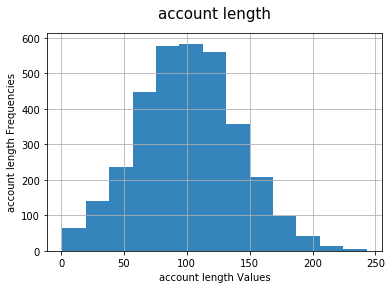

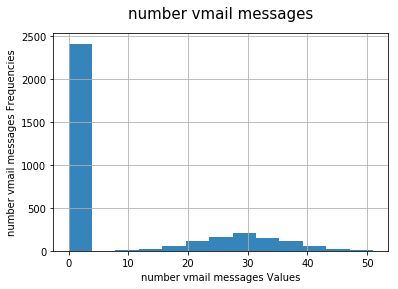

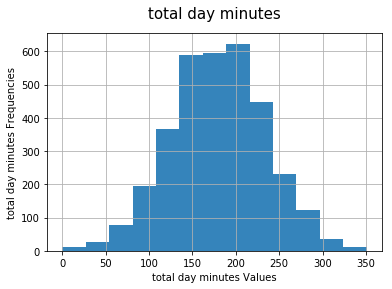

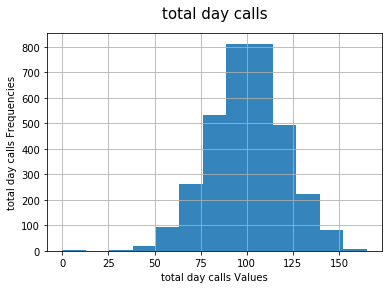

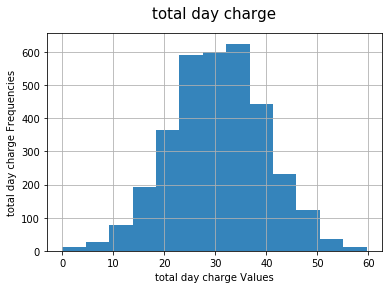

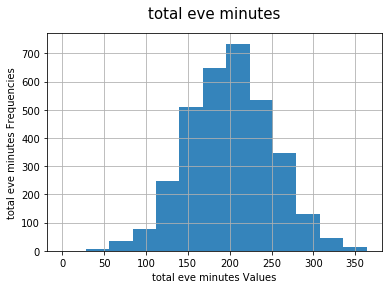

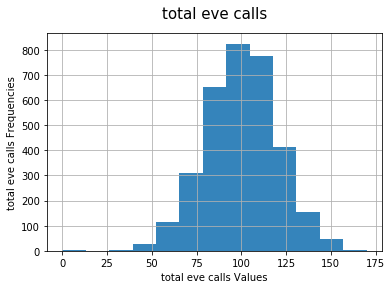

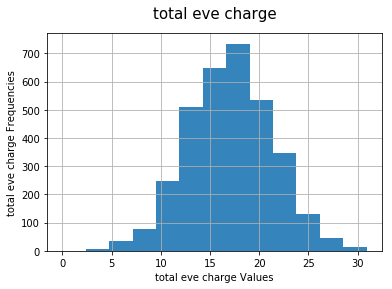

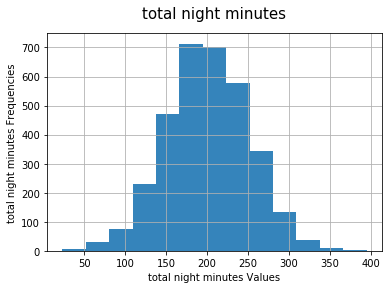

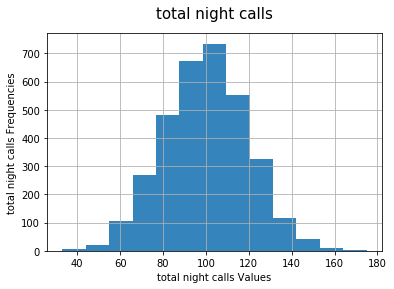

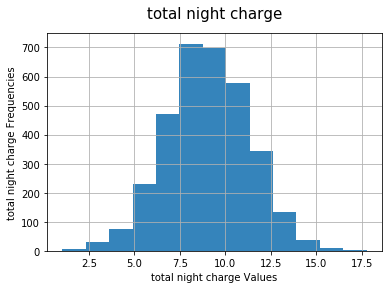

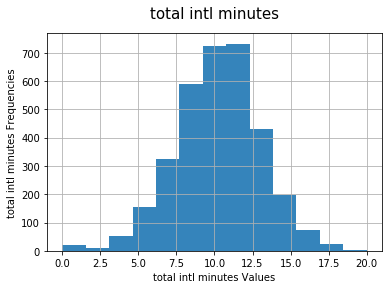

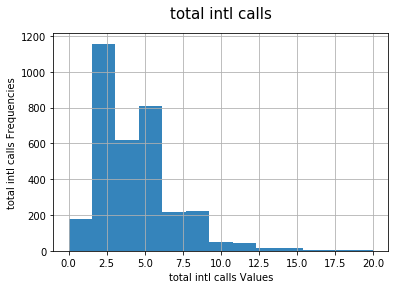

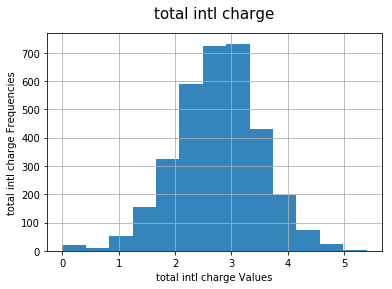

In [29]:
data_understanding.numeric_columns_distributions(df)

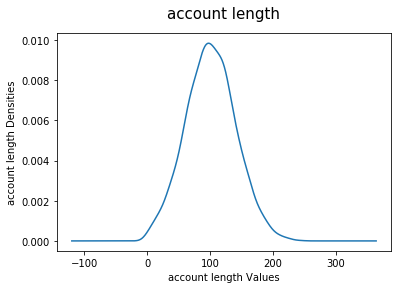

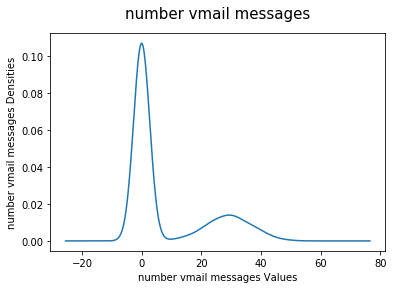

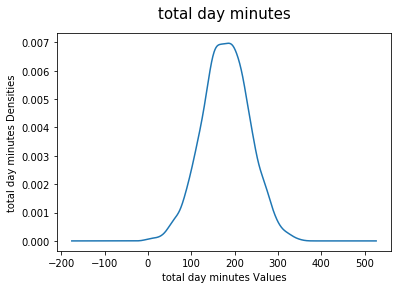

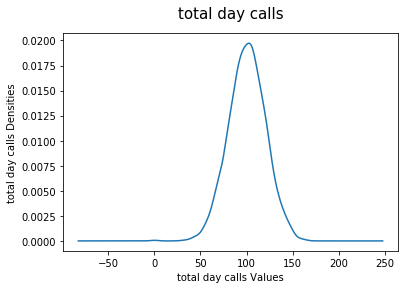

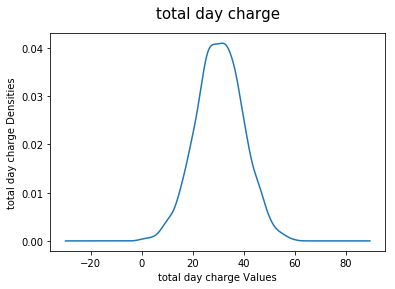

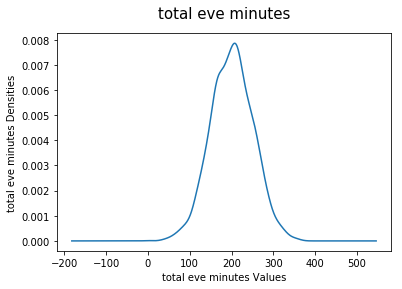

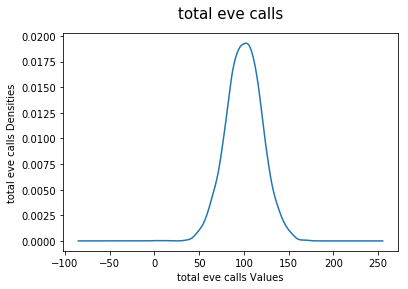

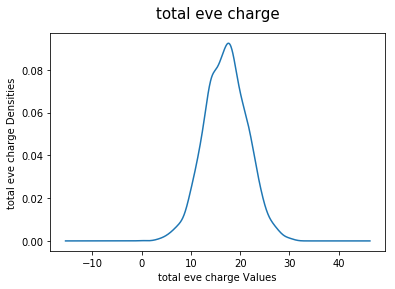

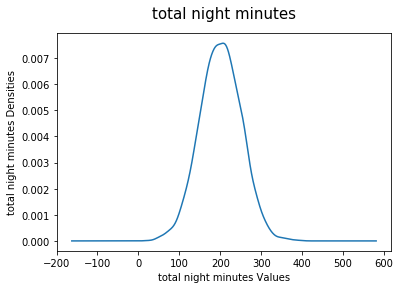

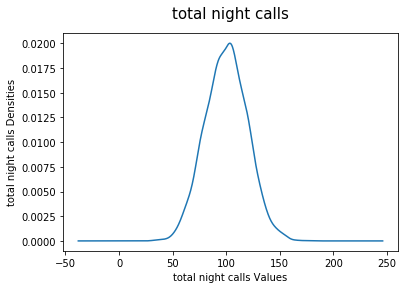

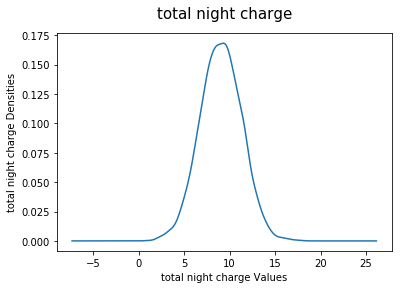

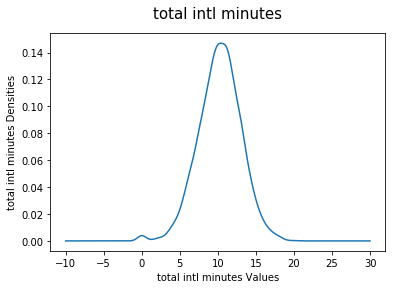

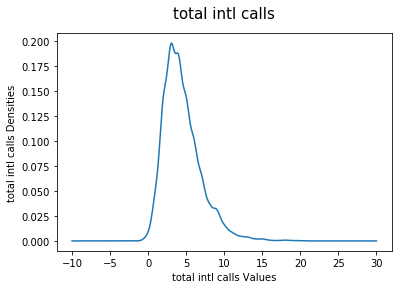

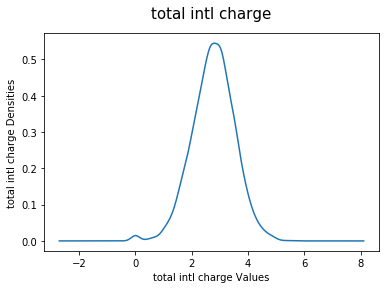

In [30]:
data_understanding.numeric_columns_distributions(df, 1)

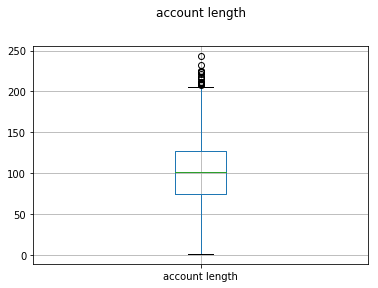

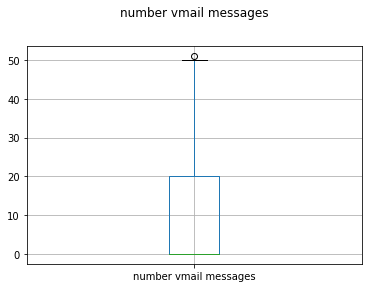

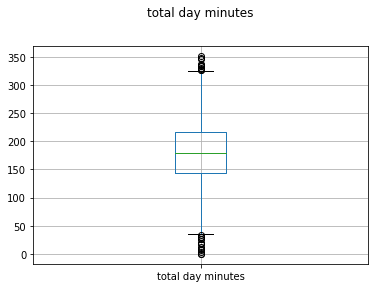

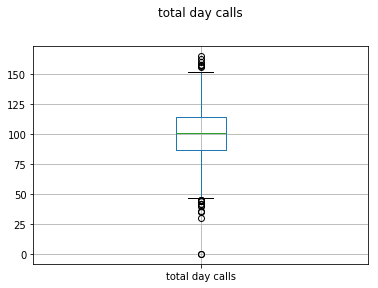

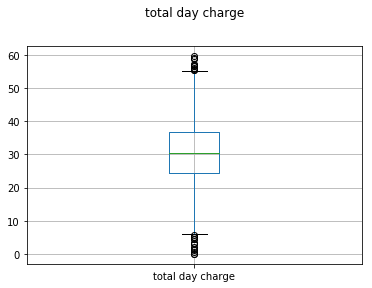

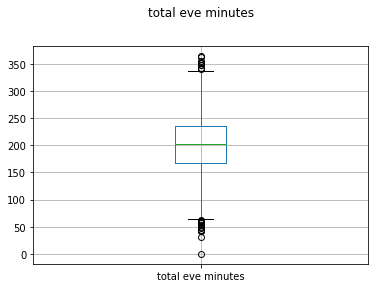

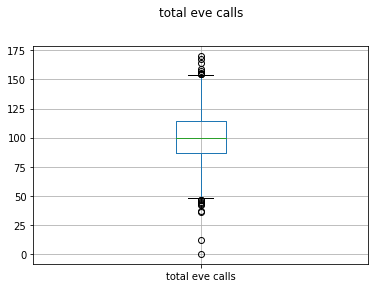

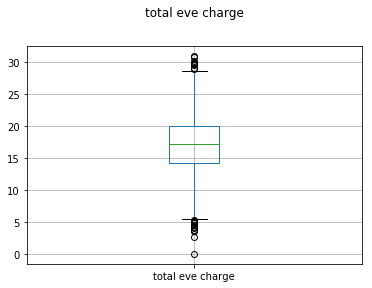

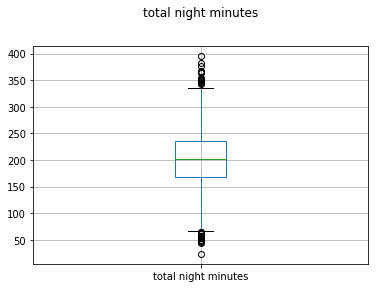

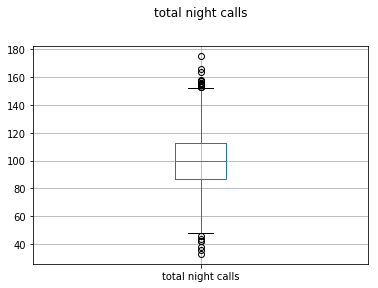

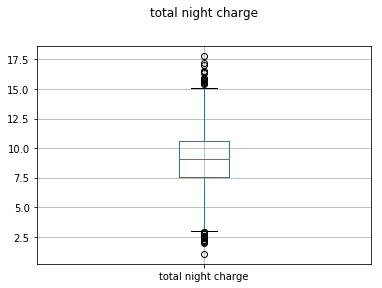

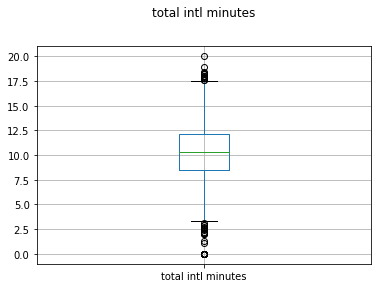

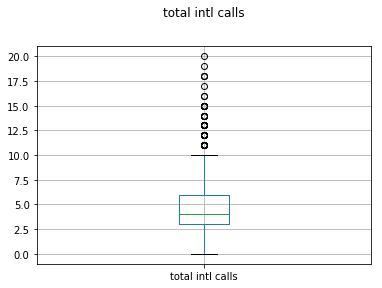

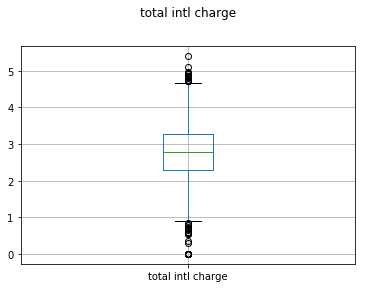

In [31]:
data_understanding.numeric_columns_boxplots(df)

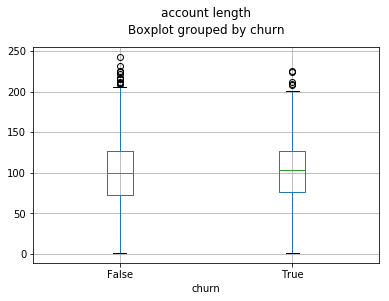

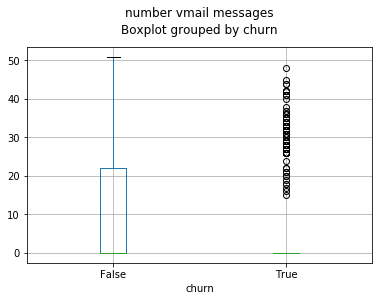

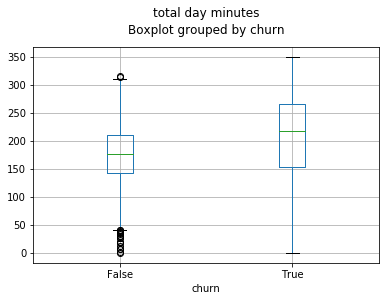

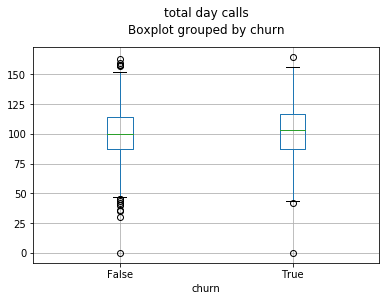

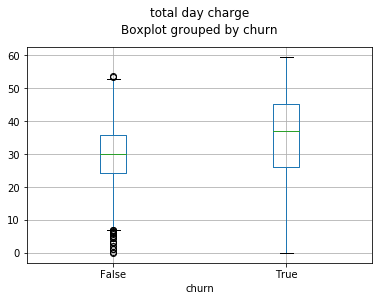

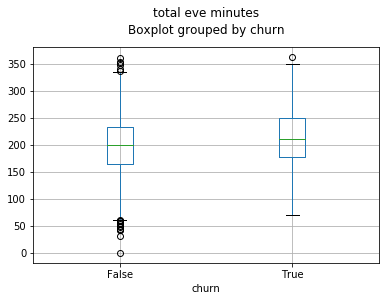

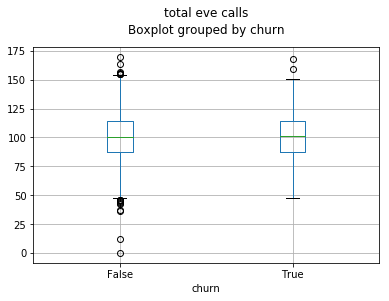

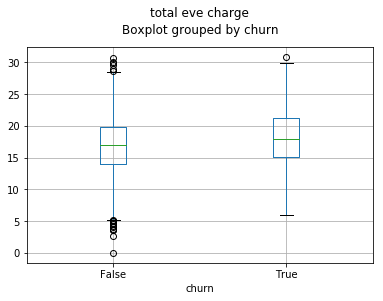

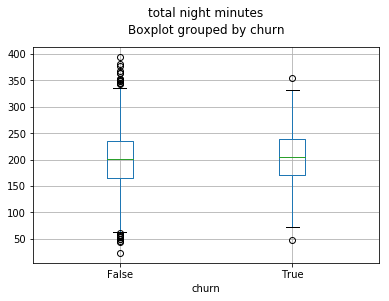

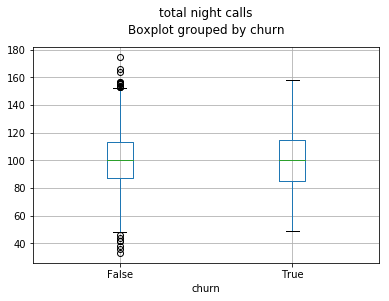

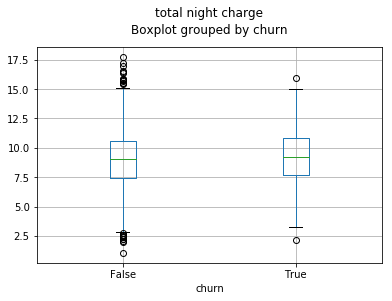

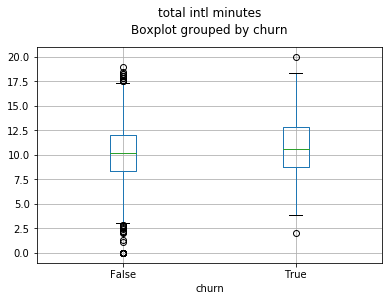

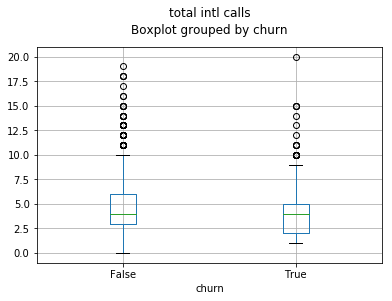

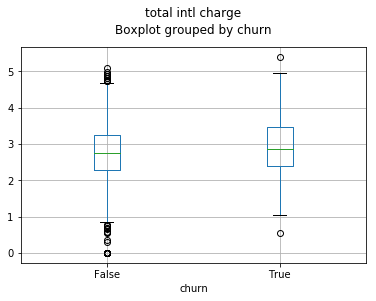

In [32]:
data_understanding.numeric_columns_boxplots(df,'churn')

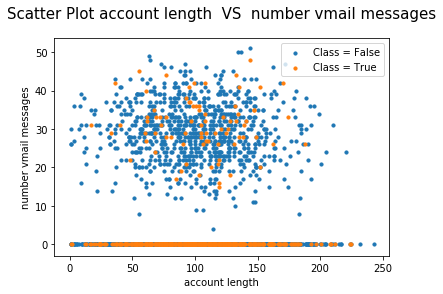

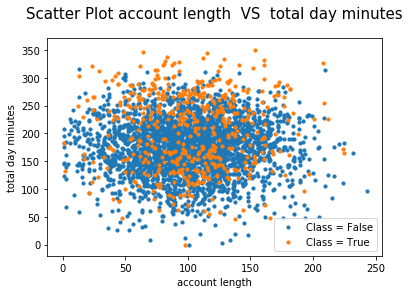

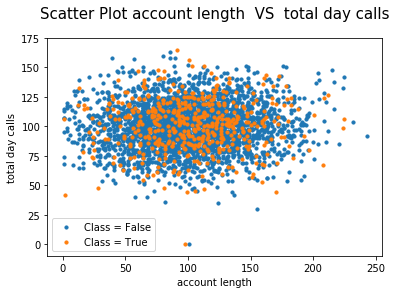

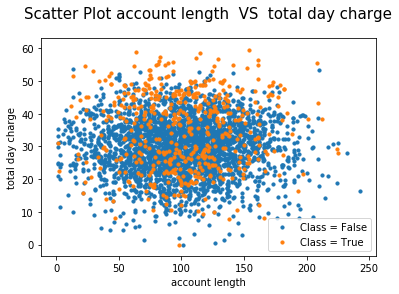

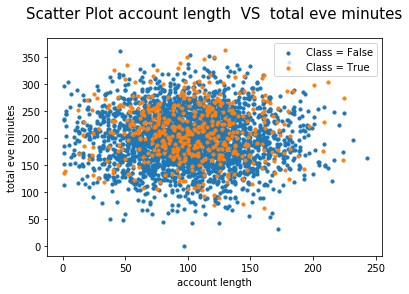

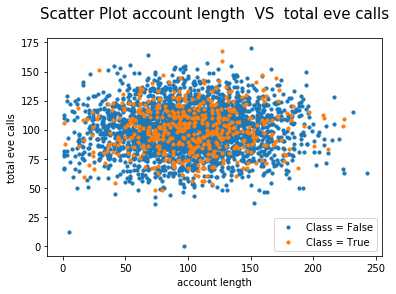

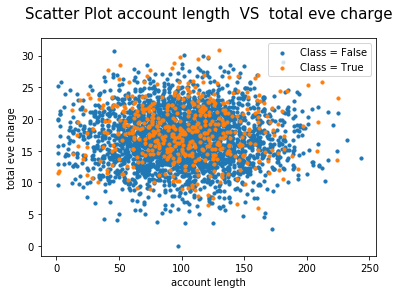

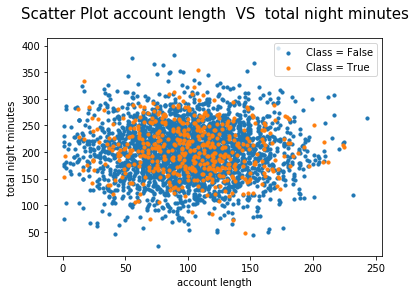

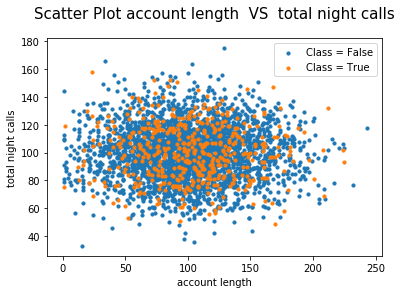

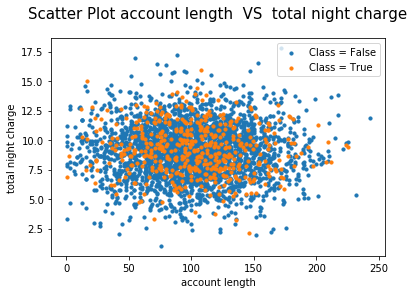

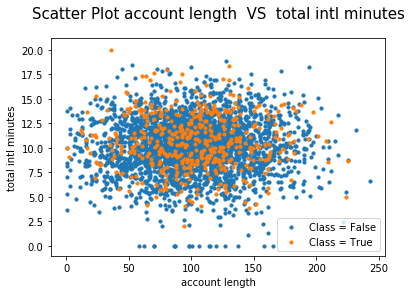

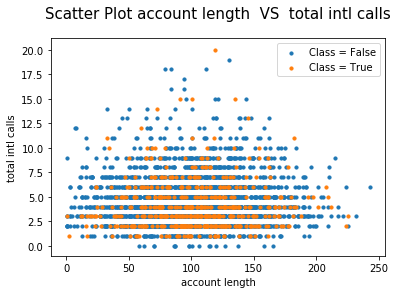

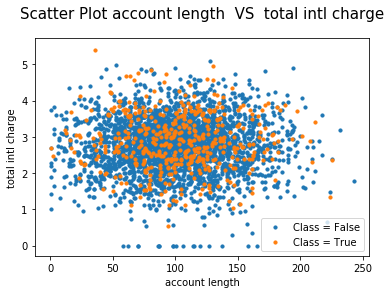

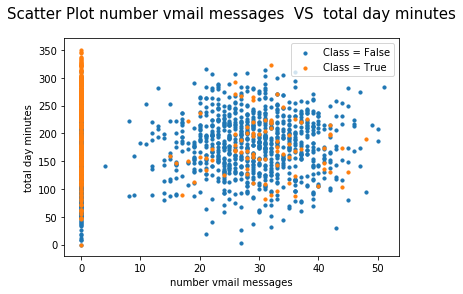

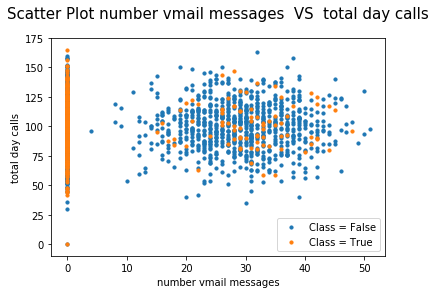

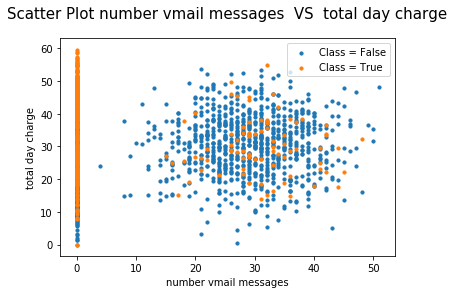

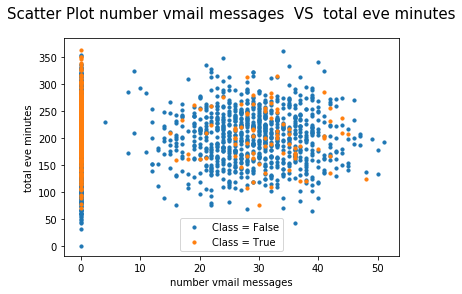

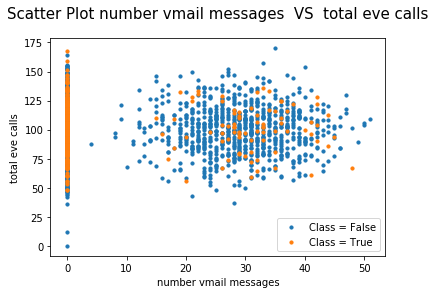

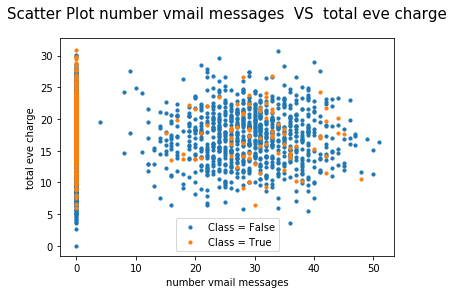

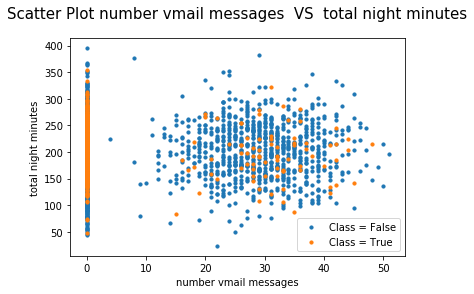

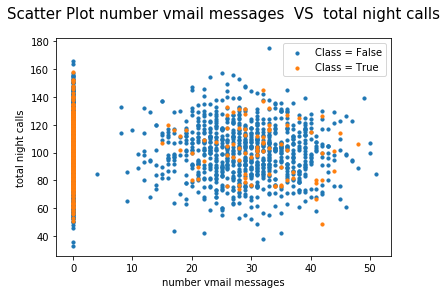

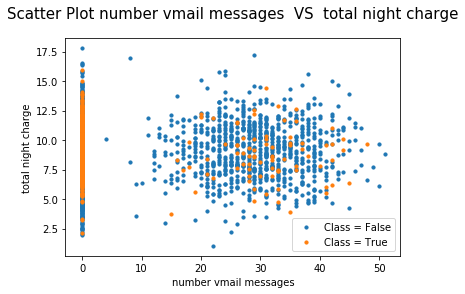

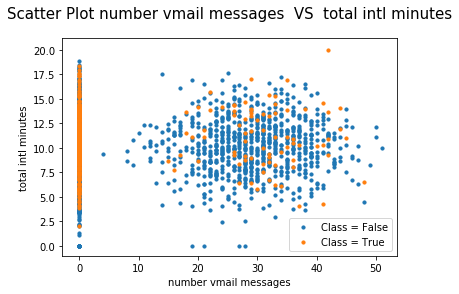

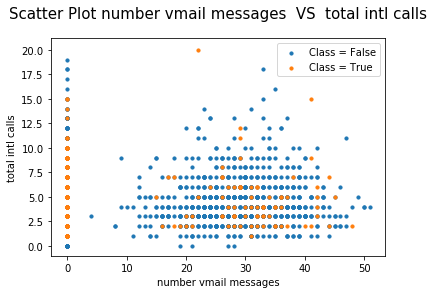

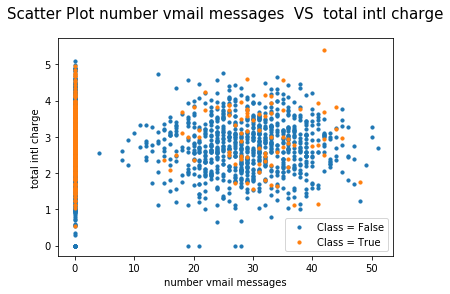

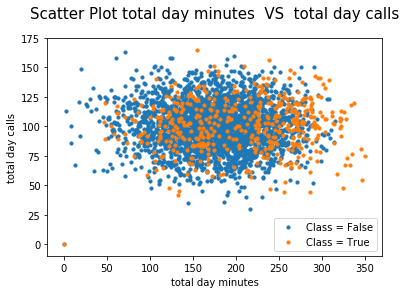

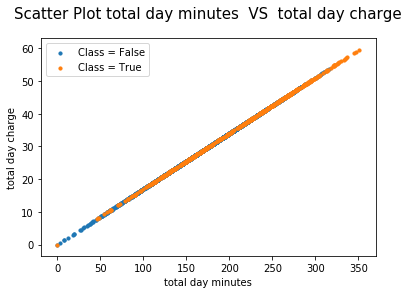

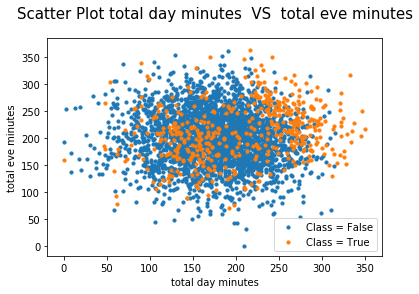

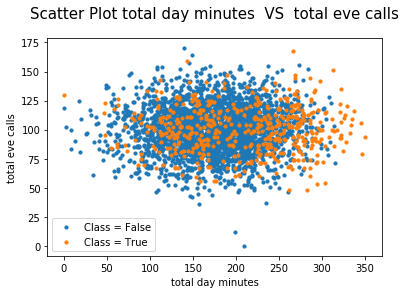

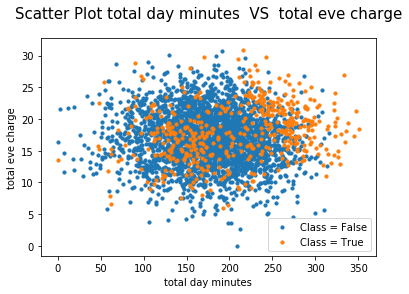

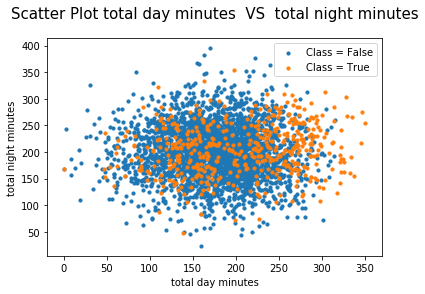

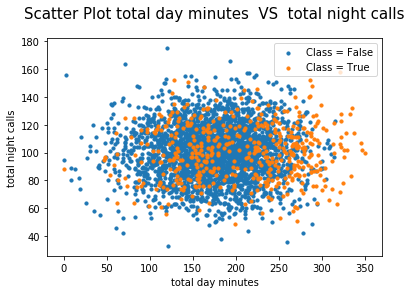

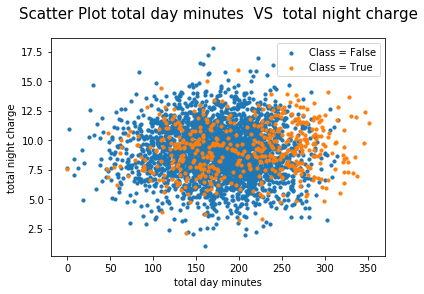

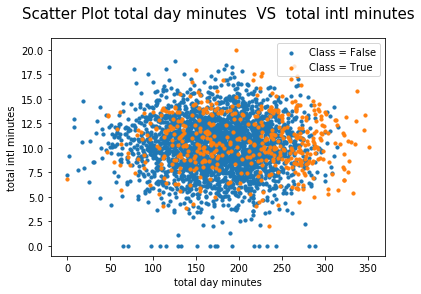

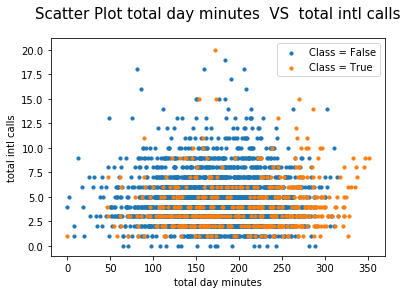

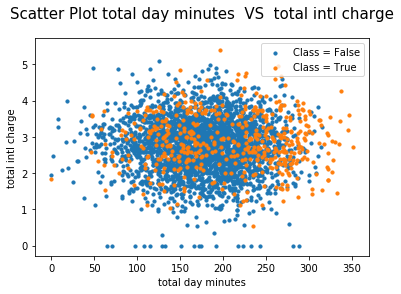

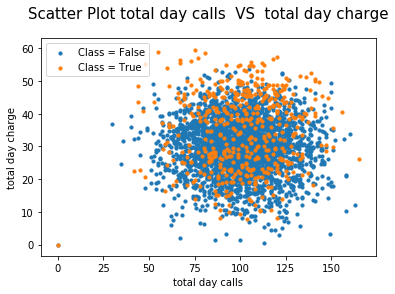

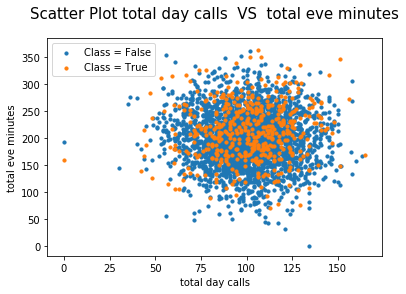

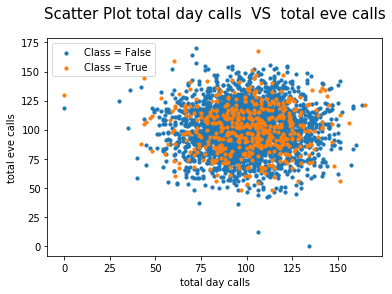

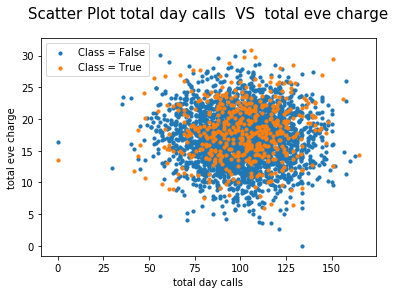

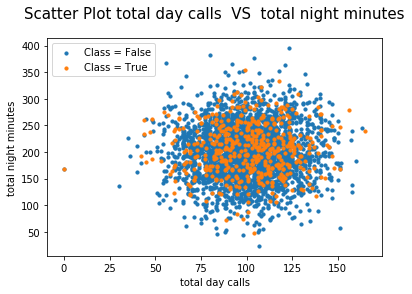

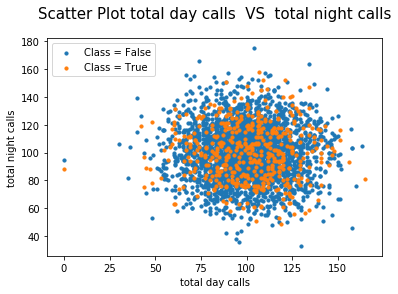

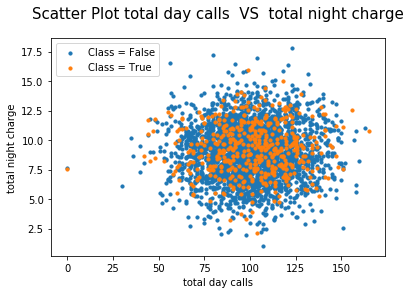

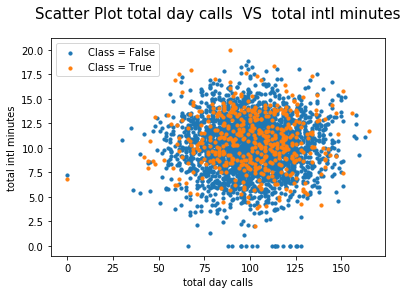

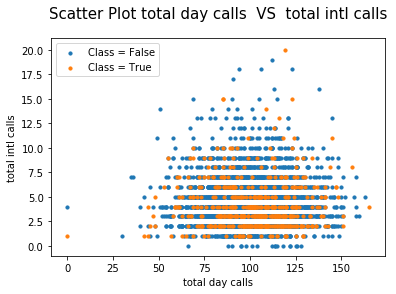

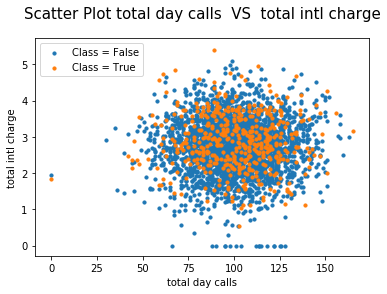

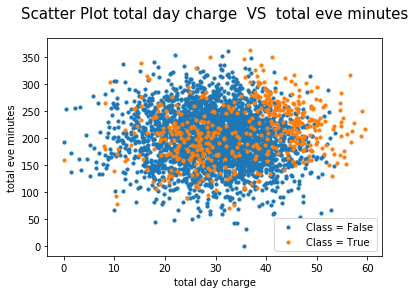

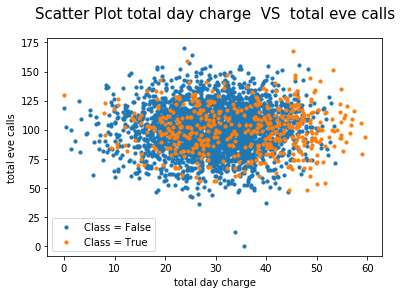

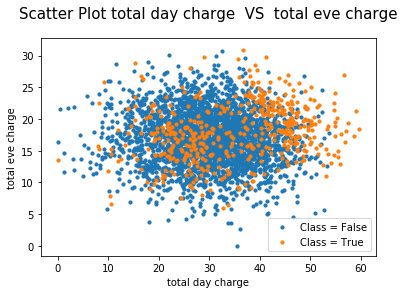

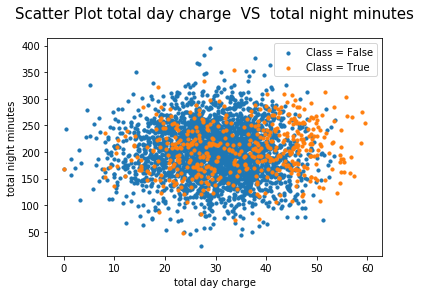

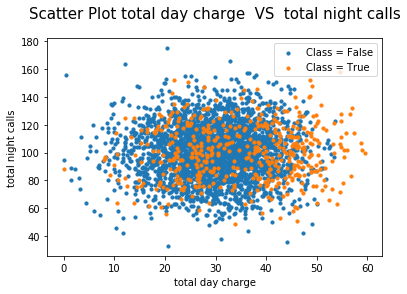

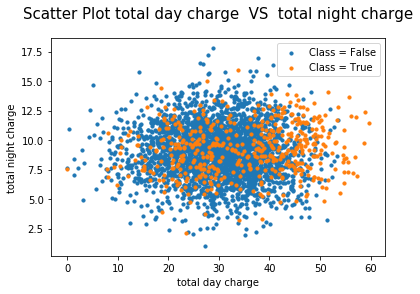

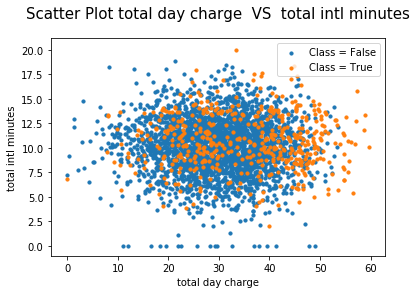

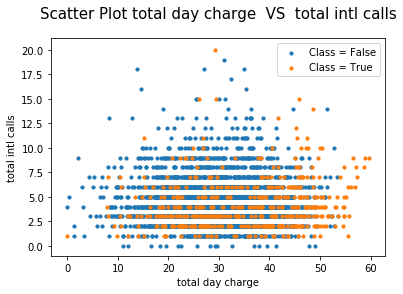

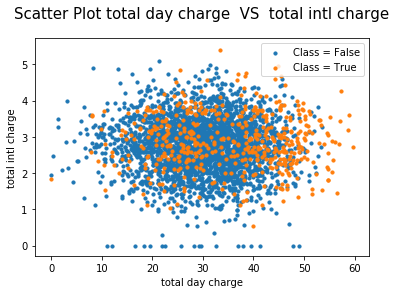

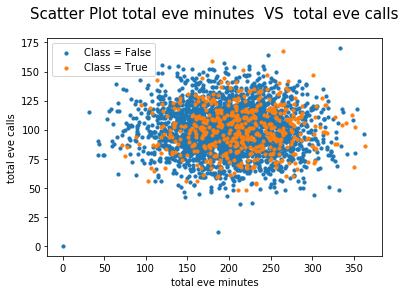

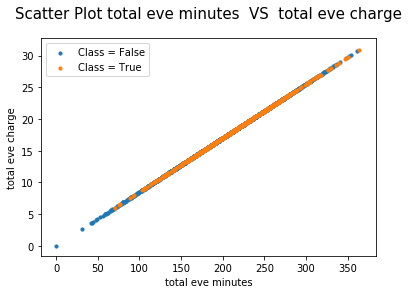

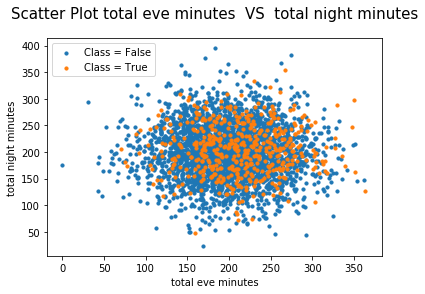

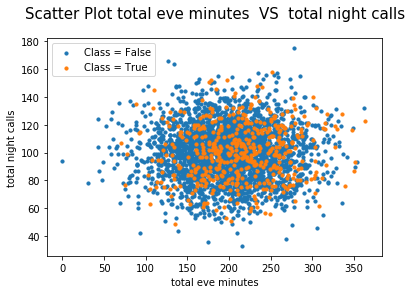

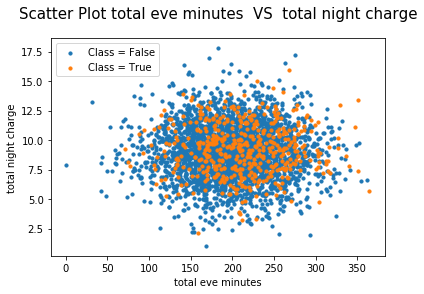

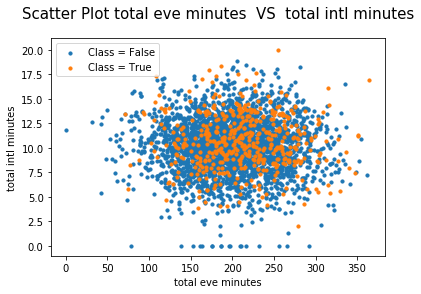

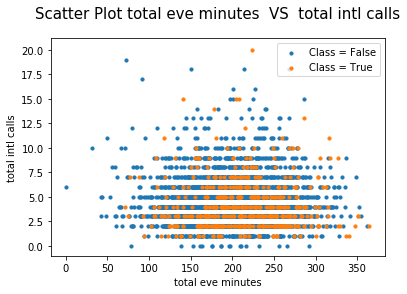

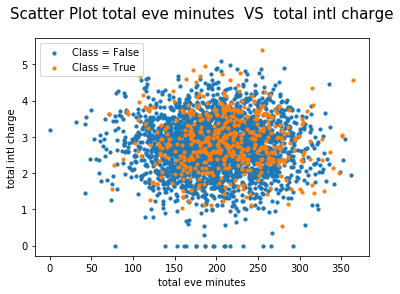

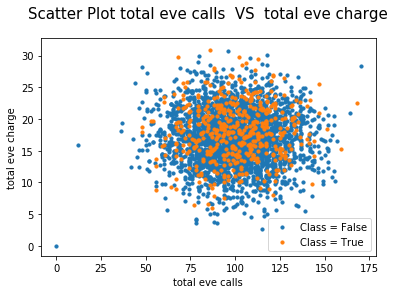

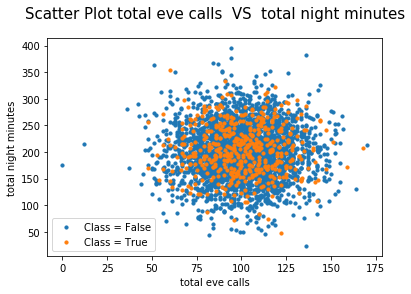

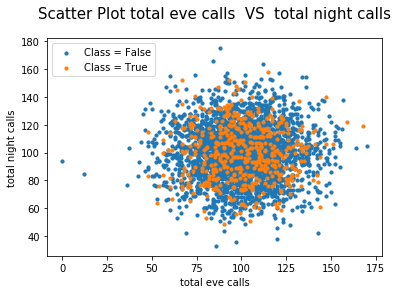

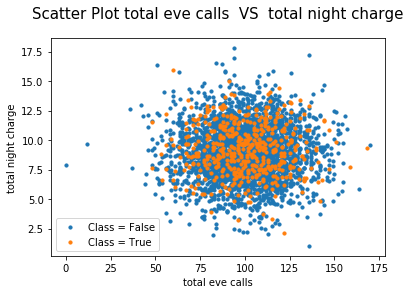

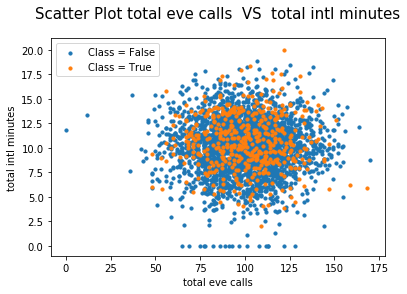

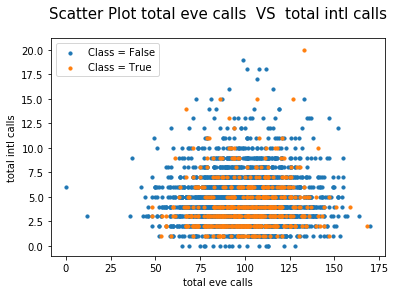

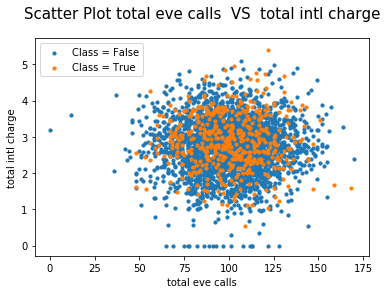

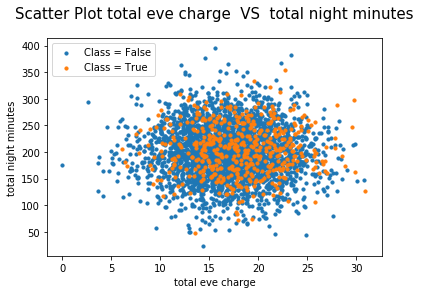

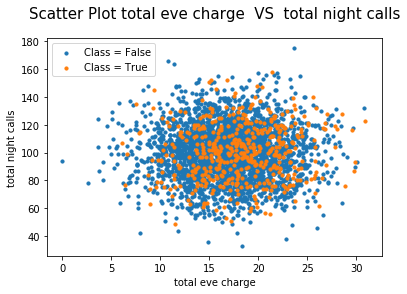

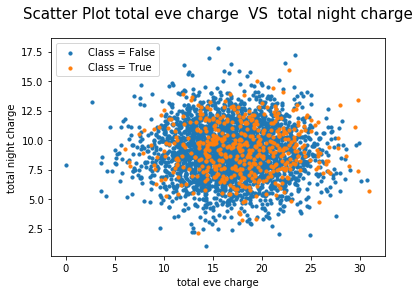

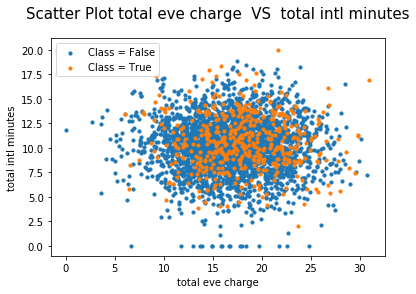

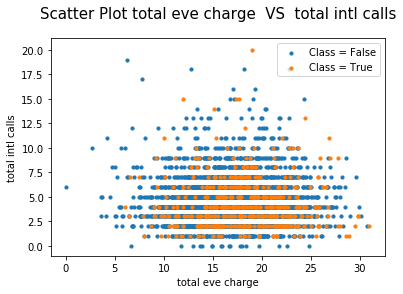

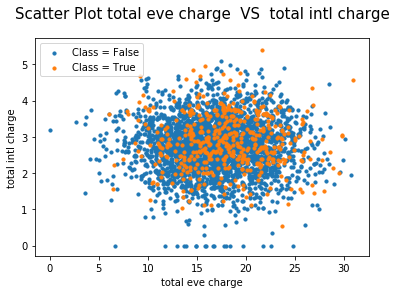

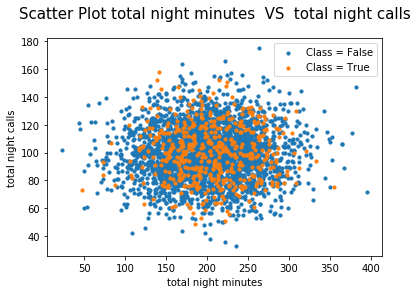

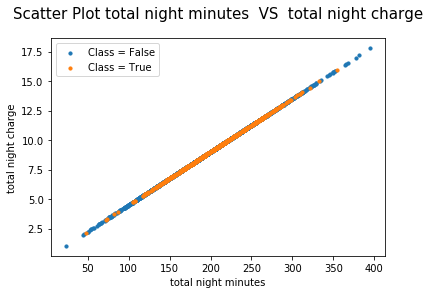

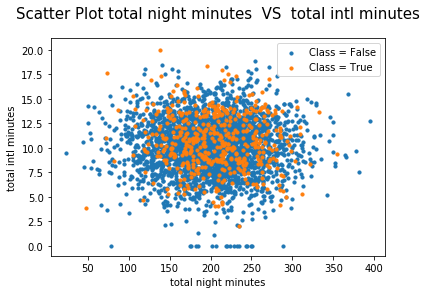

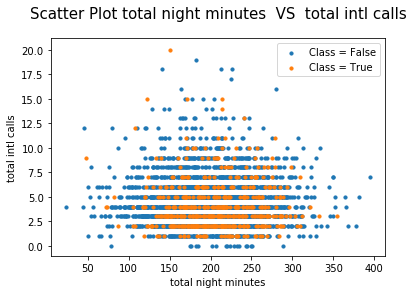

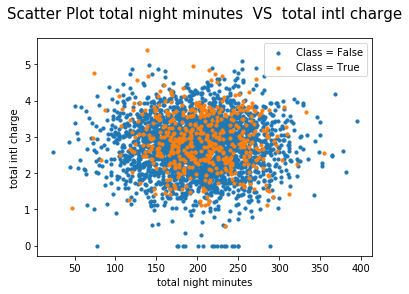

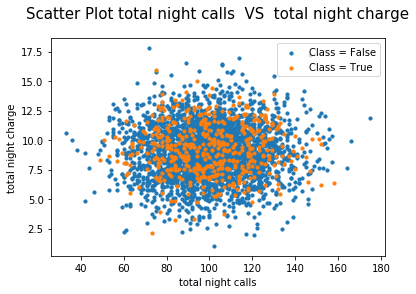

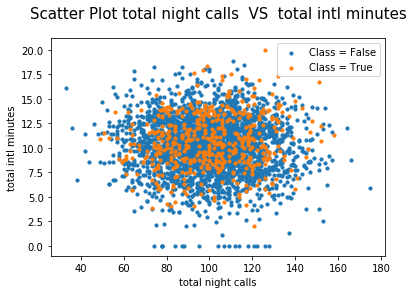

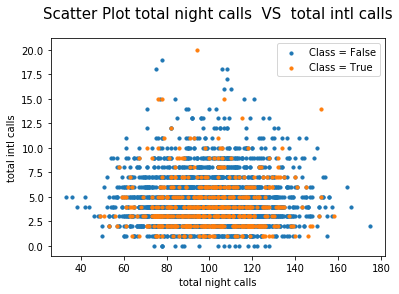

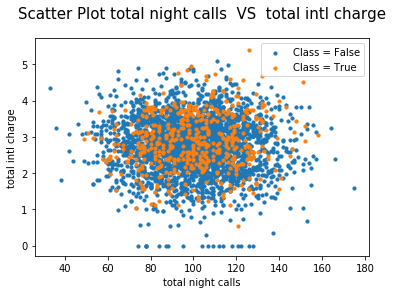

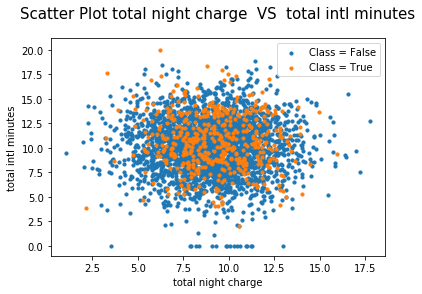

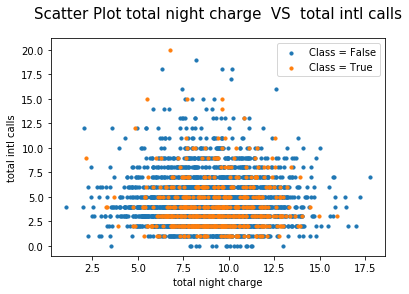

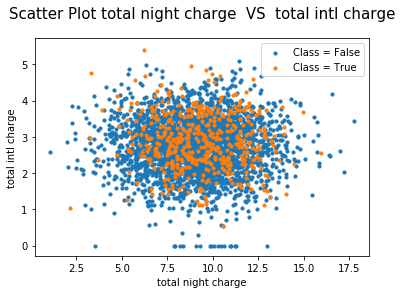

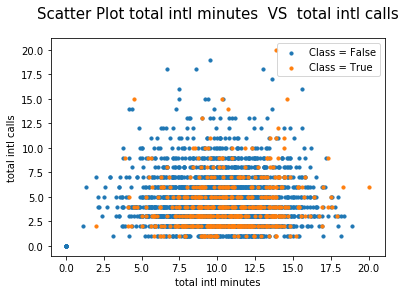

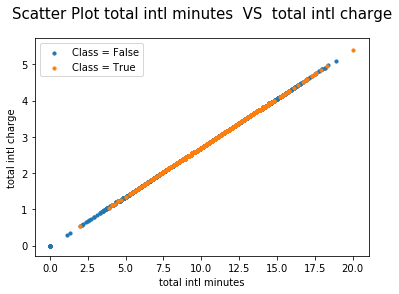

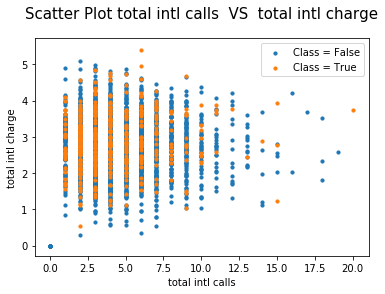

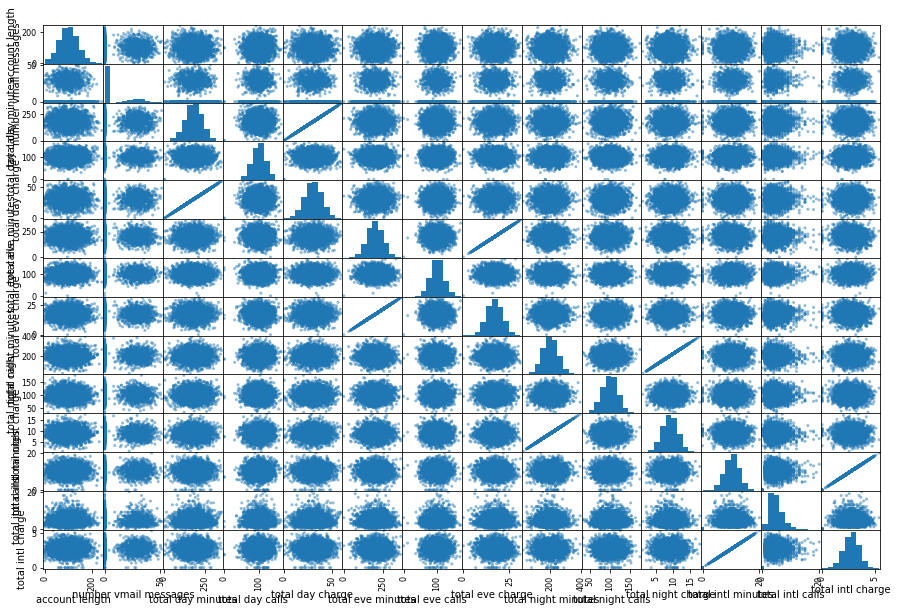

In [33]:
data_understanding.numeric_columns_scatterplot(df,'churn')

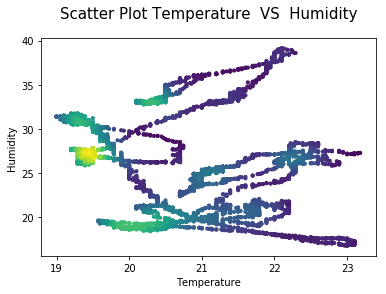

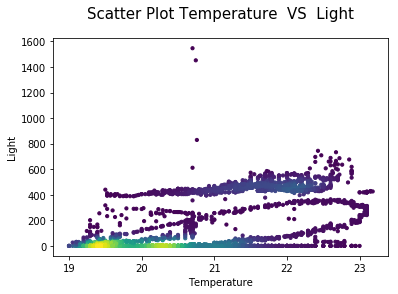

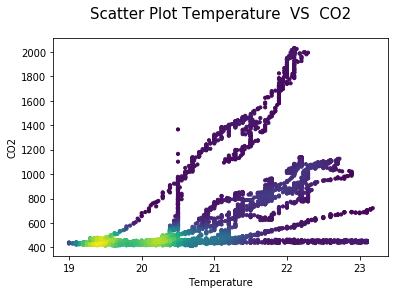

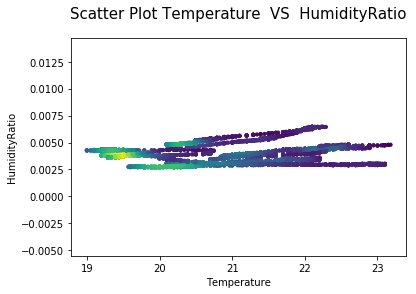

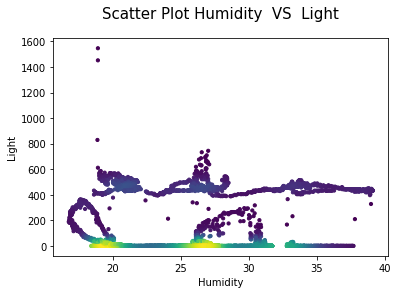

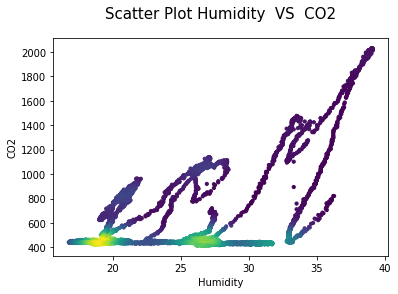

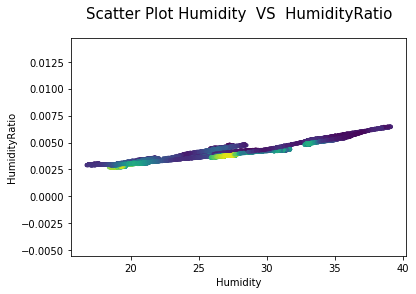

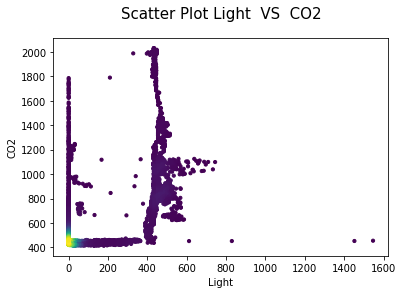

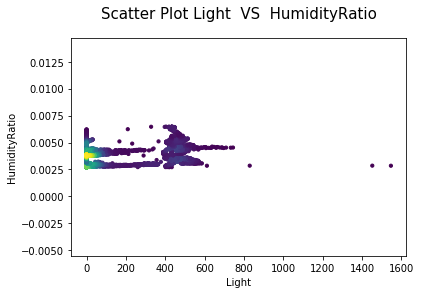

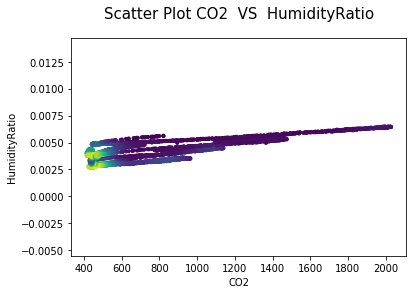

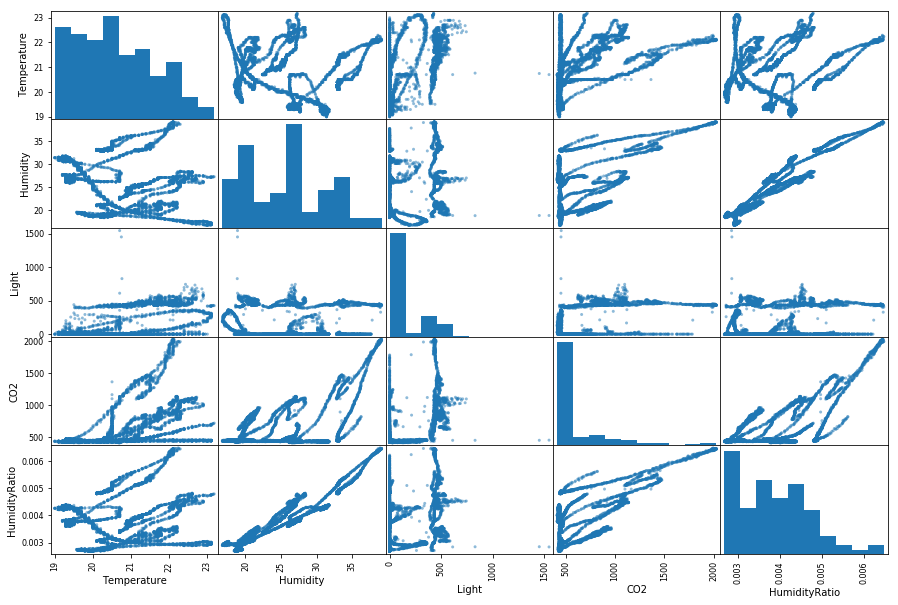

In [14]:
data_understanding.numeric_columns_scatterplot(df, 'Occupancy', gauss_kde=1)

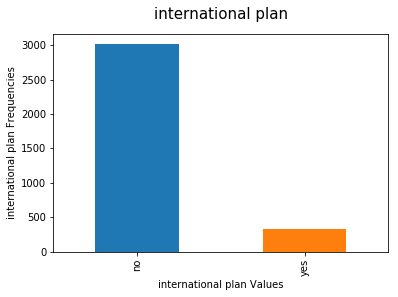

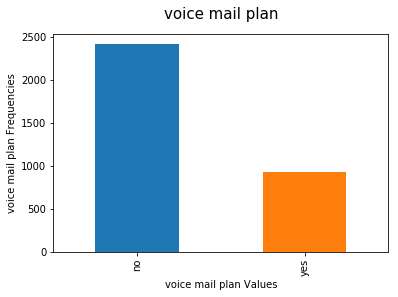

In [3]:
data_understanding.categoric_columns_distributions(df)

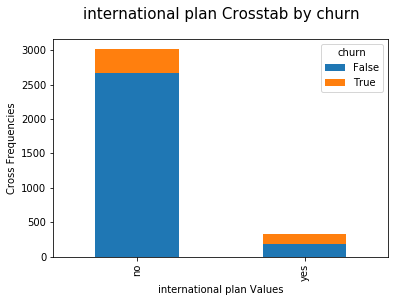

churn               False  True 
international plan              
no                   2664    346
yes                   186    137


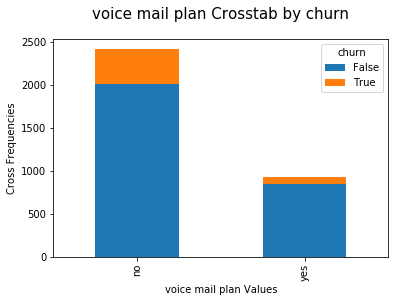

churn            False  True 
voice mail plan              
no                2008    403
yes                842     80


In [12]:
data_understanding.categoric_columns_crosstab(df, 'churn')

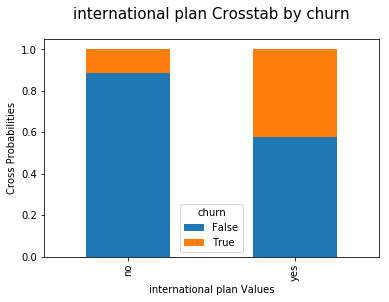

churn                  False     True 
international plan                    
no                  0.885050  0.114950
yes                 0.575851  0.424149


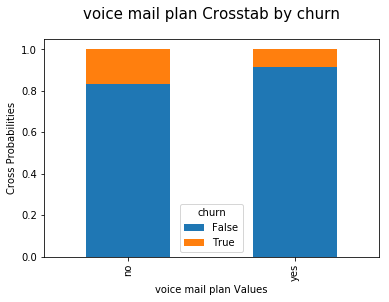

churn               False     True 
voice mail plan                    
no               0.832849  0.167151
yes              0.913232  0.086768


In [11]:
data_understanding.categoric_columns_crosstab(df, 'churn',1)